# Importing Libraries

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Loading Dataset and Initial Data Exploration

In [231]:
# Load the dataset
data = pd.read_csv('House_rent.csv')

# Display the first few rows of the dataset
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,5/13/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,5/16/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,7/4/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,5/9/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,4/29/2022,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,6/21/2022,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,6/21/2022,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,6/7/2022,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,6/20/2022,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [232]:

# Display information about the dataset (column names, data types, null values)
print("\nInformation about the dataset:")
data.info()

# Check for missing values
print("\nMissing values:")
data.isnull().sum()



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB

Missing values:


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [233]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
data.describe()




Summary statistics for numerical columns:


,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [234]:
# Check for duplicate rows
print("\nDuplicate rows:")
data.duplicated().sum()


Duplicate rows:


0

In [235]:
#  display rent statistics
def column_info(data, column_name):
    print(f"\nColumn: {column_name}")
    print(f"Mean: {data[column_name].mean()}")
    print(f"Median: {data[column_name].median()}")
    print(f"Maximum: {data[column_name].max()}")
    print(f"Minimum: {data[column_name].min()}")
    print(f"Standard Deviation: {data[column_name].std()}")

column_info(data, 'Rent')


Column: Rent
Mean: 34993.45132743363
Median: 16000.0
Maximum: 3500000
Minimum: 1200
Standard Deviation: 78106.41293734881


# Data Visualization Functions

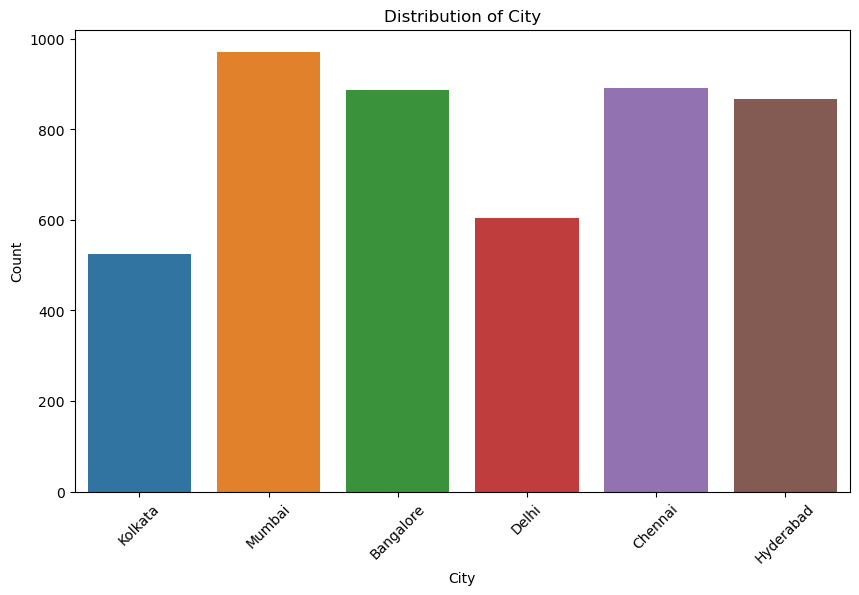

In [236]:
def visualize_categorical_feature(data, column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column_name)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Example usage of visualize_categorical_feature function
visualize_categorical_feature(data, 'City')


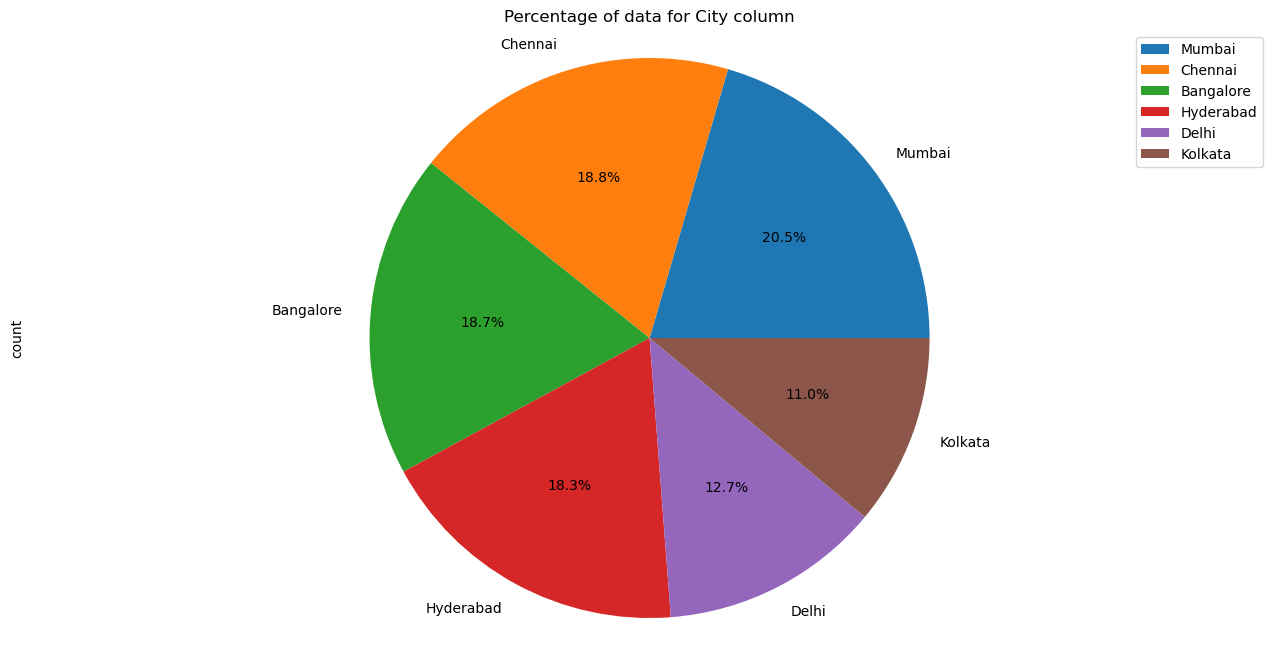

In [237]:
#visualizing features
def create_pie_plot(data, column_name):
    
    plt.figure(figsize=(16,8))
    plt.title(f'Percentage of data for {column_name} column')
    counts = data[column_name].value_counts()
    counts.plot(kind = 'pie',
                autopct = '%1.1f%%')
            
    plt.axis('equal')
    plt.legend(labels = counts.index, loc = "best")
    plt.show()

create_pie_plot(data, 'City')

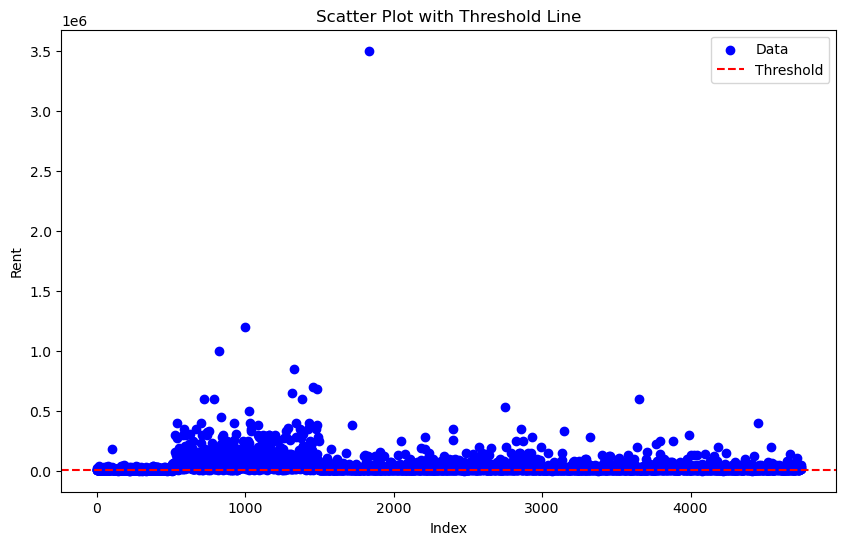

In [238]:
plt.figure(figsize=(10, 6))

threshold = 5000  # max values in dataset
plt.scatter(range(len(data['Rent'])), data['Rent'], c='b', label='Data')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Index')
plt.ylabel('Rent')
plt.title('Scatter Plot with Threshold Line')
plt.legend()
plt.show()


# Data Preprocessing

In [239]:
# Drop irrelevant columns
data = data.drop(['Posted On', 'Area Locality','Tenant Preferred','Point of Contact'], axis=1)
data.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,1
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,1
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,1


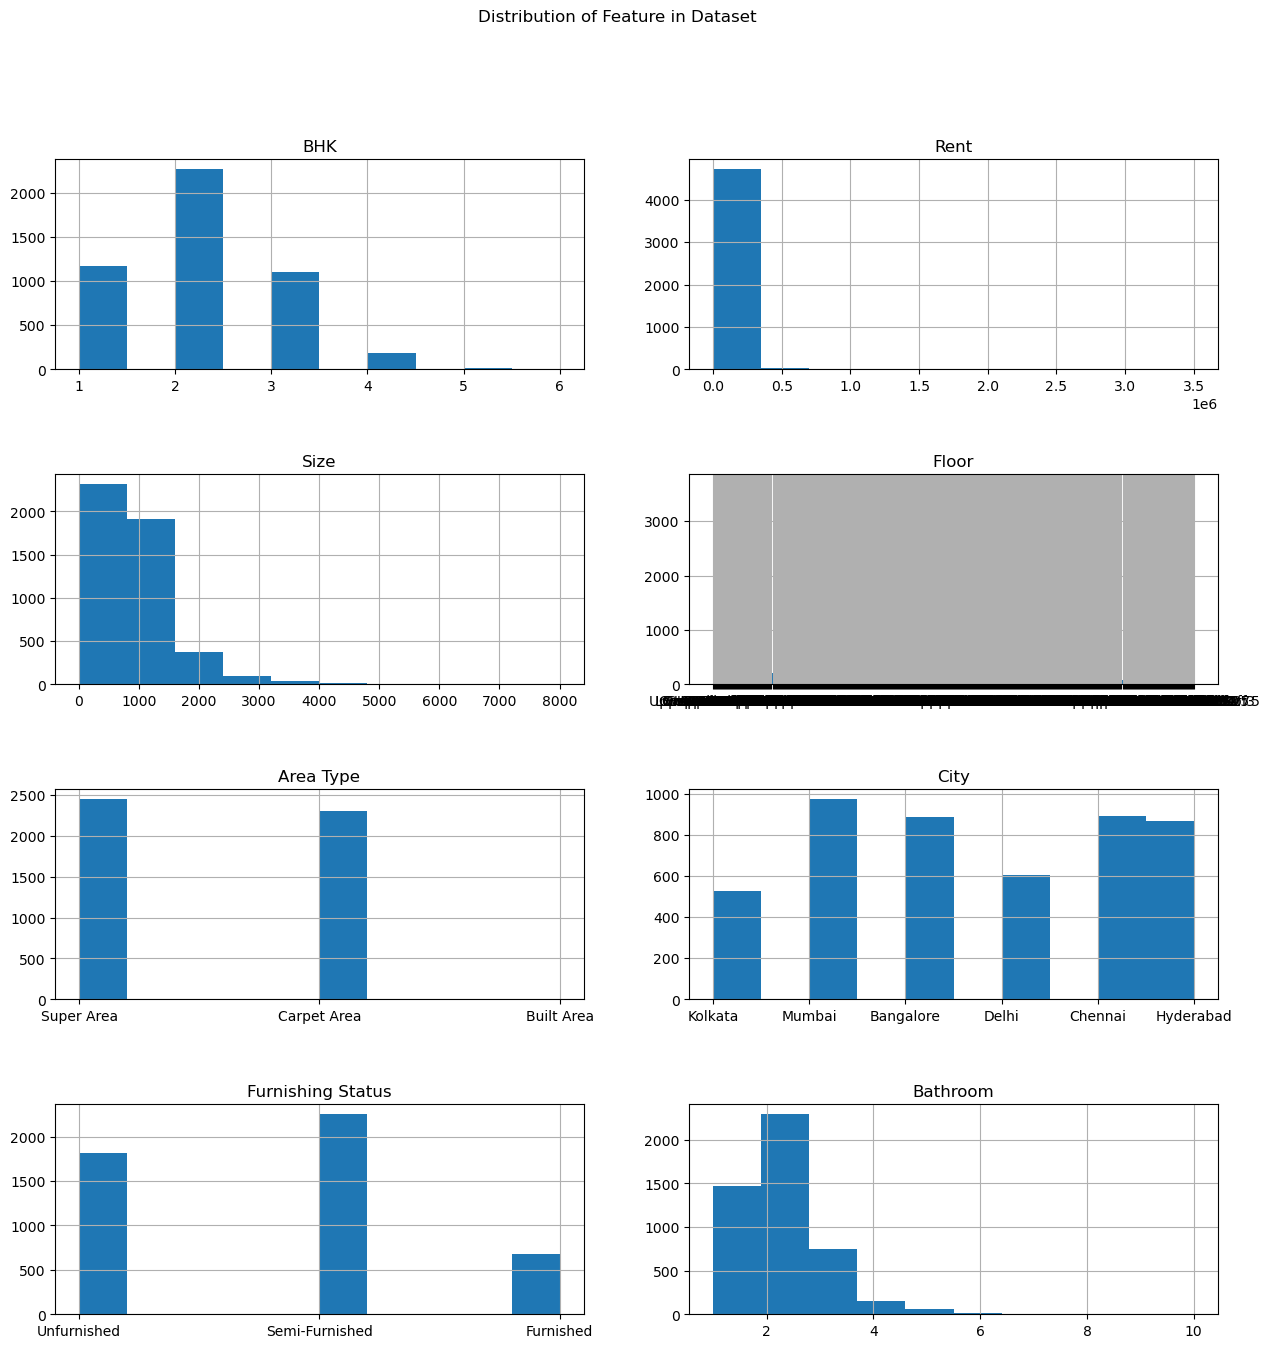

In [240]:
# Create subplots 
fig, axes = plt.subplots(nrows=int(np.ceil(len(data.columns)/2)), ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of Feature in Dataset')

# Generate histograms
for ax, column in zip(axes.flatten(), data.columns):
    ax.set_title(f'{column}')
    data[column].hist(ax=ax)

plt.show()

In [241]:
def find_level(sentence):

    sentence = sentence.split(" ")
    try:
        return " ".join(sentence[:2]) if sentence[1] == "Basement" else sentence[0]
    except:
        return sentence[0]



In [242]:
def find_levels_number(sentence):
    sentence = sentence.split(" ")
    return sentence[-1] if len(sentence) > 1 else "1"


In [243]:

data["Level"] = data["Floor"].apply(find_level)

data["Floors numbers"] = data["Floor"].apply(find_levels_number)
data.head(10)

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Bathroom,Level,Floors numbers
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,2,Ground,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,1,1,3
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,1,1,3
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,1,1,2
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,1,1,2
5,2,7000,600,Ground out of 1,Super Area,Kolkata,Unfurnished,2,Ground,1
6,2,10000,700,Ground out of 4,Super Area,Kolkata,Unfurnished,2,Ground,4
7,1,5000,250,1 out of 2,Super Area,Kolkata,Unfurnished,1,1,2
8,2,26000,800,1 out of 2,Carpet Area,Kolkata,Unfurnished,2,1,2
9,2,10000,1000,1 out of 3,Carpet Area,Kolkata,Semi-Furnished,2,1,3


In [244]:
# drop "Floor" column

data.drop(columns = "Floor", inplace = True)

In [245]:
data["Level"].replace({"Ground" : 0 , "Lower Basement" : 0, "Upper Basement" : 0},inplace = True)


data["Level"] = data["Level"].astype(int)

data["Floors numbers"] = data["Floors numbers"].astype(int)

In [246]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
encoder = LabelEncoder()

In [247]:
# see sample of data

data.sample(10)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Level,Floors numbers
2005,2,19000,800,Super Area,Bangalore,Unfurnished,2,1,4
471,1,1800,500,Super Area,Kolkata,Semi-Furnished,1,0,1
4219,3,15000,192,Super Area,Hyderabad,Semi-Furnished,3,2,4
1805,1,18000,400,Carpet Area,Bangalore,Unfurnished,1,0,3
721,1,38000,450,Carpet Area,Mumbai,Unfurnished,2,4,8
2785,3,25000,1000,Super Area,Delhi,Unfurnished,2,1,4
683,1,27000,270,Carpet Area,Mumbai,Unfurnished,1,1,4
1335,1,39000,585,Super Area,Mumbai,Unfurnished,2,3,7
2049,1,19000,625,Carpet Area,Bangalore,Unfurnished,1,2,4
1243,1,13000,385,Carpet Area,Mumbai,Unfurnished,1,6,20


# Dealing with Categorical Features

In [248]:
# #Dealing with categorical features
from sklearn.preprocessing import OrdinalEncoder

# # Define a list of categorical columns
categorical_columns = ['Area Type', 'City', 'Furnishing Status']

# # Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# # Fit and transform the categorical columns to numerical values
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])

# # Display the modified DataFrame
data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Level,Floors numbers
0,2,10000,1100,2.0,4.0,2.0,2,0,2
1,2,20000,800,2.0,4.0,1.0,1,1,3
2,2,17000,1000,2.0,4.0,1.0,1,1,3
3,2,10000,800,2.0,4.0,2.0,1,1,2
4,2,7500,850,1.0,4.0,2.0,1,1,2


In [249]:
#removing outlier found in above scatter plot

# Sort the dataset by 'Rent' column in descending order
data = data.sort_values(by='Rent', ascending=False)

# Show the top rents
print("Top Rent Values:")
data.head()

# Drop the row with the maximum rent value
max_rent_index = data_sorted.index[0]  # Get the index of the row with the maximum rent
data= data.drop(index=max_rent_index)

# Display the cleaned dataset
print("\nDataset after dropping the maximum rent value:")
data.head()


Top Rent Values:

Dataset after dropping the maximum rent value:


,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Level,Floors numbers
1001,4,1200000,5000,1.0,5.0,1.0,4,4,15
827,4,1000000,3064,1.0,5.0,1.0,4,18,45
1329,4,850000,3200,1.0,5.0,0.0,4,2,4
1459,4,700000,3200,1.0,5.0,0.0,4,24,24
1484,4,680000,1962,1.0,5.0,1.0,5,18,20


In [250]:
# Identify outliers using Z-score method
z_scores = (data['Rent'] - data['Rent'].mean()) / data['Rent'].std()
print(z_scores)


1001    19.508957
827     16.161897
1329    13.651602
1459    11.141306
1484    10.806600
          ...    
146     -0.536587
2475    -0.539935
471     -0.543282
285     -0.548302
4076    -0.553323
Name: Rent, Length: 4745, dtype: float64


In [251]:
# Remove outliers (keeping values within 3 standard deviations)
data = data[(z_scores < 3) & (z_scores > -3)]

# Splitting the Dataset

In [252]:
# Split data into features (X) and target (y)
X = data.drop('Rent', axis=1)
y = data['Rent']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [253]:
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3720, 8)
x_test shape:  (931, 8)
y_train shape:  (3720,)
y_test shape:  (931,)


# Model Building & Error Analysis

In [254]:
# Define and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Evaluation Metrics:")
# print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
# print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)



Linear Regression Model Evaluation Metrics:
Mean Absolute Error (MAE): 14378.517609008755
R^2 Score: 0.5925401450578991


In [255]:
# Define and fit the RandomForestRegressor model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Evaluation Metrics:")
# print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
# print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R^2 Score:", r2_rf)



Random Forest Model Evaluation Metrics:
Mean Absolute Error (MAE): 9175.372673443426
R^2 Score: 0.7481755730238726


In [256]:
print("linear regression score")
model.score(X_train, y_train)

linear regression score


0.5470858893294206

In [257]:
print("Random Forest score")
model_rf.score(X_train, y_train)

Random Forest score


0.965336244061218

# Visualization of Model Performance

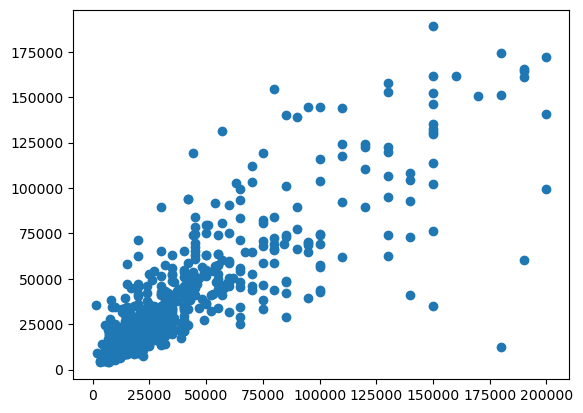

In [258]:
plt.scatter(y_test, y_pred_rf)
plt.show()

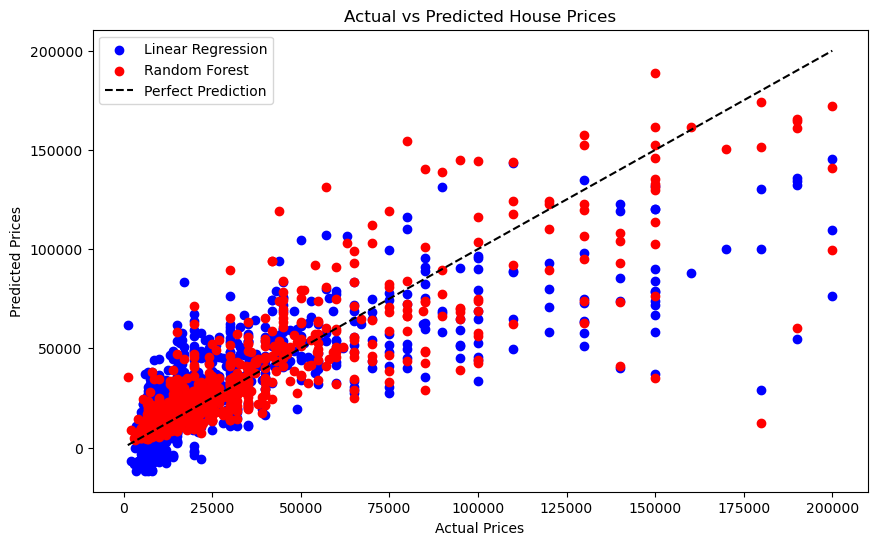

In [259]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [260]:
from sklearn.svm import SVR  # Import SVR from sklearn

# Define and fit the SVR model
model_svm = SVR()
model_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("\nSupport Vector Machine (SVM) Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_svm)
print("Mean Absolute Error (MAE):", mae_svm)
print("Root Mean Squared Error (RMSE):", rmse_svm)
print("R^2 Score:", r2_svm)




Support Vector Machine (SVM) Model Evaluation Metrics:
Mean Squared Error (MSE): 1376626987.5863132
Mean Absolute Error (MAE): 19539.272586996725
Root Mean Squared Error (RMSE): 37102.92424575606
R^2 Score: -0.1764344621532612


In [261]:

model_svm.score(X_train, y_train)

-0.1378170708571369

In [262]:
# Predicting House Rent using the Trained Model

# Use the trained linear regression model to make predictions
predicted_rent_lr = model.predict(X_test)

# Use the trained random forest model to make predictions
predicted_rent_rf = model_rf.predict(X_test)

# Use the trained support vector machine (SVM) model to make predictions
predicted_rent_svm = model_svm.predict(X_test)

# Compare the first few predictions with the actual rent values
predictions_comparison = pd.DataFrame({
    'Actual Rent': y_test,
    'Predicted Rent (Linear Regression)': predicted_rent_lr,
    'Predicted Rent (Random Forest)': predicted_rent_rf,
    'Predicted Rent (SVM)': predicted_rent_svm
})

predictions_comparison.head()


,Actual Rent,Predicted Rent (Linear Regression),Predicted Rent (Random Forest),Predicted Rent (SVM)
2833,7500,-399.739925,10905.082251,15002.337304
4371,13000,21246.330294,16160.142857,15337.666511
1175,180000,130543.509513,151440.000000,15773.246393
4094,16000,28146.895855,12118.333333,15444.535165
3510,7000,-7207.099953,6814.857143,15000.056472
